In [174]:
import pandas as pd
import matplotlib.pyplot as plt


## Cau a

In [163]:
df_san_pham = pd.read_excel("DuLieuThucHanh2_V1.xlsx", sheet_name="San Pham")
df_nhan_vien = pd.read_excel("DuLieuThucHanh2_V1.xlsx", sheet_name="Nhan Vien")
df_hoa_don = pd.read_excel("DuLieuThucHanh2_V1.xlsx", sheet_name="Hoa Don")
df_thong_tin = pd.read_excel("DuLieuThucHanh2_V1.xlsx", sheet_name="Thong Tin Hoa Don")


## Cau b

In [164]:
df_ban_hang = df_san_pham.merge(df_thong_tin, on=['ID San Pham'], how="left")
df_ban_hang =  df_ban_hang.groupby(["ID San Pham", "Ten"]).agg({"So Luong_y": "sum"}).reset_index()
df_ban_hang.rename(columns={"So Luong_y": "So Luong Da Ban"}, inplace=True)
print(df_ban_hang)
best_seller =  df_ban_hang.agg({"So Luong Da Ban": "max"})["So Luong Da Ban"]
print("========San Pham Ban Chay Nhat============")
print(df_ban_hang[df_ban_hang["So Luong Da Ban"] == best_seller])


    ID San Pham                          Ten  So Luong Da Ban
0             1                  Máy hút bụi             15.0
1             2           Điện thoại di động              8.0
2             3                  Laptop Dell             10.0
3             4           Tai nghe Bluetooth             13.0
4             5                    Quạt trần             39.0
5             6                Máy tính bảng             13.0
6             7                    Tivi OLED              7.0
7             8                 Máy ảnh DSLR             13.0
8             9              Bàn là hơi nước             17.0
9            10            Máy lọc không khí             21.0
10           11               Ổ cứng SSD 1TB              7.0
11           12                       Bếp từ              8.0
12           13               Máy pha cà phê              8.0
13           14             Dàn âm thanh 5.1             11.0
14           15                  Máy sấy tóc             15.0
15      

In [140]:
df_doanh_thu =  df_san_pham.merge(df_ban_hang, on=["ID San Pham"])
sum_revenue = 0

for index, product in df_doanh_thu.iterrows():
  sl = product["So Luong Da Ban"]
  price = product["Gia"]
  if sl is not None and price is not None:
    sum_revenue += int(sl) * int(price)

print("Tong Doanh Thu Cua Cua Hang: " + str(sum_revenue))



Tong Doanh Thu Cua Cua Hang: 14555


In [141]:
# Update lai so luong
df_doanh_thu["So Luong"] = df_doanh_thu["So Luong"] - df_doanh_thu["So Luong Da Ban"]

print(df_doanh_thu)
  


    ID San Pham                          Ten  So Luong  Gia  So Luong Da Ban
0             1                  Máy hút bụi      85.0   50             15.0
1             2           Điện thoại di động      67.0   30              8.0
2             3                  Laptop Dell     140.0   25             10.0
3             4           Tai nghe Bluetooth      67.0   40             13.0
4             5                    Quạt trần      11.0   20             39.0
5             6                Máy tính bảng     107.0   35             13.0
6             7                    Tivi OLED      23.0   60              7.0
7             8                 Máy ảnh DSLR      27.0   75             13.0
8             9              Bàn là hơi nước      73.0   15             17.0
9            10            Máy lọc không khí      39.0   45             21.0
10           11               Ổ cứng SSD 1TB      18.0   80              7.0
11           12                       Bếp từ      62.0   55              8.0

In [166]:
df_thong_tin = df_thong_tin.groupby(["ID Hoa Don", "ID San Pham"]).agg({"So Luong" : "sum"}).reset_index()
print(df_thong_tin)

    ID Hoa Don  ID San Pham  So Luong
0            1            1        10
1            1            2         5
2            2            3         8
3            2            4        12
4            3            5        35
..         ...          ...       ...
63          47           34         2
64          47           35         1
65          48           36         3
66          48           37         2
67          49           38         2

[68 rows x 3 columns]


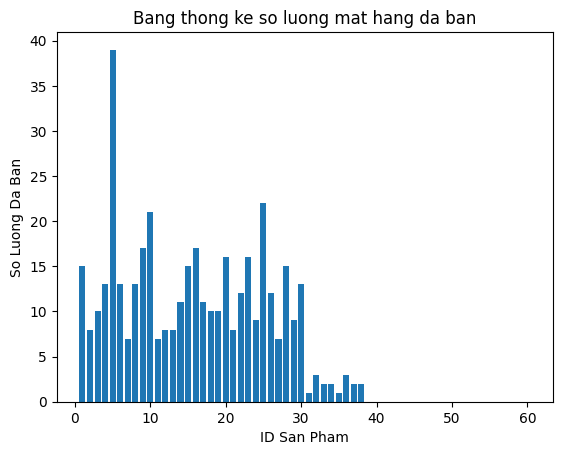

In [189]:
plot = plt.bar(df_ban_hang["ID San Pham"], df_ban_hang["So Luong Da Ban"])

plt.xlabel('ID San Pham')
plt.ylabel('So Luong Da Ban')
plt.title('Bang thong ke so luong mat hang da ban')

plt.show()